In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as tfl
import h5py

# ***Loading dataset***

In [2]:
all_dataset = h5py.File("./drive/MyDrive/FoodVsNonFood_dataset/datasets.hdf5", "r")

In [3]:
X_train = np.array(all_dataset["train_set_X"])
y_train = np.array(all_dataset["train_set_y"])

In [4]:
X_val = np.array(all_dataset["val_set_X"])
y_val = np.array(all_dataset["val_set_y"])

In [5]:
X_eval = np.array(all_dataset["eval_set_X"])
y_eval = np.array(all_dataset["eval_set_y"])

In [6]:
print("X_train shape = ", X_train.shape)
print("y_train shape = ", y_train.shape)
print("X_val shape = ", X_val.shape)
print("y_val shape = ", y_val.shape)
print("X_eval shape = ", X_eval.shape)
print("y_eval shape = ", y_eval.shape)

X_train shape =  (3000, 64, 64, 3)
y_train shape =  (3000,)
X_val shape =  (1000, 64, 64, 3)
y_val shape =  (1000,)
X_eval shape =  (1000, 64, 64, 3)
y_eval shape =  (1000,)


# ***reshaping y's***

In [7]:
y_train = y_train.reshape(3000,1)
y_val = y_val.reshape(1000,1)
y_eval = y_eval.reshape(1000,1)

In [8]:
print("=========== Reshaped Y's =============")
print("y_train shape = ", y_train.shape)
print("y_val shape = ", y_val.shape)
print("y_eval shape = ", y_eval.shape)

=========== Reshaped Y's =============
y_train shape =  (3000, 1)
y_val shape =  (1000, 1)
y_eval shape =  (1000, 1)


# ***Normalizing features***

In [9]:
X_train_norm = X_train/255.0
X_val_norm = X_val/255.0
X_eval_norm = X_eval/255.0

In [10]:
print("------- Normalized features ---------")
print("X_train_norm shape = ", X_train_norm.shape)
print("X_val_norm shape = ", X_val_norm.shape)
print("X_eval_norm shape = ", X_eval_norm.shape)

------- Normalized features ---------
X_train_norm shape =  (3000, 64, 64, 3)
X_val_norm shape =  (1000, 64, 64, 3)
X_eval_norm shape =  (1000, 64, 64, 3)


# ***Final dataset !***

In [11]:
print("==================================================================")
print("Number of train examples = ", X_train_norm.shape[0])
print("Number of validation examples = ", X_val_norm.shape[0])
print("Number of evaluation examples = ", X_eval_norm.shape[0])
print("- - - - - - - - - - - - - - - - - - - - - - - ")
print("X_train_norm shape = ", X_train_norm.shape)
print("y_train shape = ", y_train.shape)
print("X_val_norm shape = ", X_val_norm.shape)
print("y_val shape = ", y_val.shape)
print("X_eval_norm shape = ", X_eval_norm.shape)
print("y_eval shape = ", y_eval.shape)
print("==================================================================")

Number of train examples =  3000
Number of validation examples =  1000
Number of evaluation examples =  1000
- - - - - - - - - - - - - - - - - - - - - - - 
X_train_norm shape =  (3000, 64, 64, 3)
y_train shape =  (3000, 1)
X_val_norm shape =  (1000, 64, 64, 3)
y_val shape =  (1000, 1)
X_eval_norm shape =  (1000, 64, 64, 3)
y_eval shape =  (1000, 1)


# ***display image***

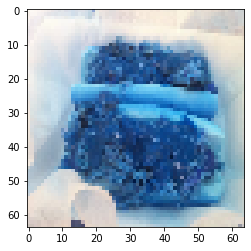

In [12]:
index = 100
plt.imshow(X_train[index]) #display sample training image
plt.show()

# ***building keras' Sequential model***

In [44]:
def foodModel():

  model = tf.keras.Sequential([
                               tf.keras.layers.ZeroPadding2D(padding=3, input_shape = (64,64,3)),
                               tf.keras.layers.Conv2D(64, (11,11), strides=1),
                               tf.keras.layers.BatchNormalization(axis = 3),
                               tf.keras.layers.ReLU(),
                               tf.keras.layers.MaxPool2D(),

                               tf.keras.layers.Conv2D(64, (2,2), strides=1),
                               tf.keras.layers.BatchNormalization(axis = 3),
                               tf.keras.layers.ReLU(),
                               tf.keras.layers.MaxPool2D(),
                               

                               tf.keras.layers.Conv2D(64, (2,2), strides=1),
                               tf.keras.layers.BatchNormalization(axis = 3),
                               tf.keras.layers.ReLU(),
                               tf.keras.layers.MaxPool2D(),

                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])
  return model

# ***compile foodModel()***

In [45]:
food_model = foodModel()

In [46]:
food_model.compile(optimizer='adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

# ***summary of food_model***

In [47]:
food_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_5 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 60, 60, 64)        23296     
_________________________________________________________________
batch_normalization_15 (Batc (None, 60, 60, 64)        256       
_________________________________________________________________
re_lu_15 (ReLU)              (None, 60, 60, 64)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 29, 29, 64)        16448     
_________________________________________________________________
batch_normalization_16 (Batc (None, 29, 29, 64)       

# ***train model***

In [48]:
food_model.fit(X_train_norm, y_train, epochs=12, batch_size=32)

Epoch 1/12
94/94 [==============================] - 3s 25ms/step - loss: 0.4456 - accuracy: 0.8020
Epoch 2/12
94/94 [==============================] - 2s 23ms/step - loss: 0.3432 - accuracy: 0.8543
Epoch 3/12
94/94 [==============================] - 2s 23ms/step - loss: 0.3053 - accuracy: 0.8747
Epoch 4/12
94/94 [==============================] - 2s 23ms/step - loss: 0.2416 - accuracy: 0.8980
Epoch 5/12
94/94 [==============================] - 2s 23ms/step - loss: 0.2244 - accuracy: 0.9123
Epoch 6/12
94/94 [==============================] - 2s 23ms/step - loss: 0.1918 - accuracy: 0.9217
Epoch 7/12
94/94 [==============================] - 2s 23ms/step - loss: 0.1752 - accuracy: 0.9340
Epoch 8/12
94/94 [==============================] - 2s 23ms/step - loss: 0.1306 - accuracy: 0.9553
Epoch 9/12
94/94 [==============================] - 2s 23ms/step - loss: 0.1205 - accuracy: 0.9543
Epoch 10/12
94/94 [==============================] - 2s 23ms/step - loss: 0.1142 - accuracy: 0.9543
Epoch 11/

# ***evaluate model***

In [49]:
food_model.evaluate(X_val_norm, y_val)

32/32 [==============================] - 1s 13ms/step - loss: 0.3078 - accuracy: 0.8670


[0.3077860176563263, 0.8669999837875366]

In [25]:
food_model.save("my_food_model(88_99).h5")